In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [6]:
from autoencoders import autoencoder
import tensorflow as tf

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

#distintas profundidades para un mismo espacio latente por cada lista
modelDepths_100 = [[100], [392,100,392],[392,196,100,196,392]]

modelDepths_75 = [[75],[588,75,588] ,[588,441,75,441,588],
                  [588,441,330,250,75,250,330,441,588]]

modelDepths_50 = [[50],[392,50,392] ,[392,196,50,196,392],[392,196,100,50,100,196,392]]

modelDepths_25 = [[25],[392,25,392],[392,196,25,196,392],[392,196,100,50,25,50,100,196,392]]

modelDepths_15 = [[15], [392,15,392], [392,196,15,196,392],[392,196,100,50,25,15,25,50,100,196,392]]

modelDepths_5 = [[5], [200,5,200], [392,196,100,50,25,10,5,10,25,50,100,196,392]]


In [4]:
def multipleModels(seqDepths, X_train, X_val, y_train, y_val):
  #given a sequence of autoencoder dephts, creates and trains the autoencoder and KNN the classifier
  #returns a sequence with respective trained models
  res = []
  for arq in seqDepths:
    res.append(autoencoder(arq, arq[int(len(arq)/2)], 'relu'))
    res[-1].construct()
    res[-1].trainAndReduce(X_train, X_val)
    res[-1].diagnose(y_train,y_val,15)
  
  return res


In [5]:
models_100 = multipleModels(modelDepths_100, x_train,x_val,y_train, y_val)

In [7]:
models_75 = multipleModels(modelDepths_75, x_train,x_val,y_train,y_val)


In [8]:
models_50 = multipleModels(modelDepths_50, x_train,x_val,y_train,y_val)


In [9]:
models_25 = multipleModels(modelDepths_25, x_train,x_val,y_train,y_val)


In [10]:
models_15 = multipleModels(modelDepths_15, x_train,x_val,y_train,y_val)

In [11]:
models_5 = multipleModels(modelDepths_5, x_train,x_val,y_train,y_val)

In [12]:
all_models = [models_5,models_15,models_25, models_50, models_75, models_100]

In [68]:
#performance df con 1 columna por modelo

model_depth = []
latentDims = []
model_classif_time = []
model_red_time = []
model_classif_acc = []
model_loss = []
for models in all_models:
  for model in models:
    model_depth.append(len(model.hDims))
    latentDims.append(model.lDim)
    model_classif_time.append(model.classifierTimePerformances[0])
    model_red_time.append(model.reductionTimePerformance)
    model_classif_acc.append(model.classifierAccuracyPerformances[0])
df_performances = pd.DataFrame([model_depth,latentDims,
model_classif_time,
model_red_time,
model_classif_acc]).T
df_performances.columns=['#hidden', 'latent dim', 't_classif', 't_red','acc']
print(df_performances)




NameError: name 'all_models' is not defined

In [31]:
df_performances.to_csv("autoenc_performances.csv")


# Resultados
nota: esta notebook fue corrida en kaggle.com por una cuestion de recursos y de tiempo de ejecucion

In [23]:
import pandas as pd
df_performances = pd.read_csv("autoenc_performances.csv", index_col="Unnamed: 0")
df_performances.rename(columns ={"latent dim":"latent_dim", "# hidden": "nHidden"}, inplace=True)

## Analisis de los Resultados:

-(hecho)tiempo de clasificacion en funcion del espacio latente (un histograma por espacio)
-(hecho)accuracy en funcion del espacio latente y el numero de capas (superficie)
-(hecho)tiempo de reduccion en funcion del numero de capas y el espacio latente
-misma profundidad, distintas dimensiones
conclusiones (chequear): mas profundidad (a mismo espacio latente) -> mas accuracy
                                                pero tambien -> mas t-reduccion
                         menor dimension -> menor t-clasif
                         
                         

In [29]:
dfs = []
for k in [5,15,25,50,75,100]:
     dfs.append(df_performances[df_performances["latent_dim"]== k])


for df in dfs:
    df['nHidden']=df['nHidden'].astype(int)
    df['latent_dim'] = df['latent_dim'].astype(int)

/tmp/ipykernel_7219/4253812337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nHidden']=df['nHidden'].astype(int)
/tmp/ipykernel_7219/4253812337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latent_dim'] = df['latent_dim'].astype(int)


In [28]:
df_performances

,nHidden,latent_dim,t_classif,t_red,acc
0,1.0,5.0,49.707213,36.440642,0.7570
1,3.0,5.0,66.966978,41.917629,0.8108
2,13.0,5.0,66.747666,83.144911,0.8100
3,1.0,15.0,198.137094,41.869787,0.8281
4,3.0,15.0,276.126565,39.180795,0.8544
5,5.0,15.0,290.101149,82.931478,0.8556
6,11.0,15.0,222.380187,49.295376,0.8507
7,1.0,25.0,301.645557,41.855028,0.8414
8,3.0,25.0,356.903113,39.106270,0.8570
9,5.0,25.0,360.988705,41.937099,0.8596


In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

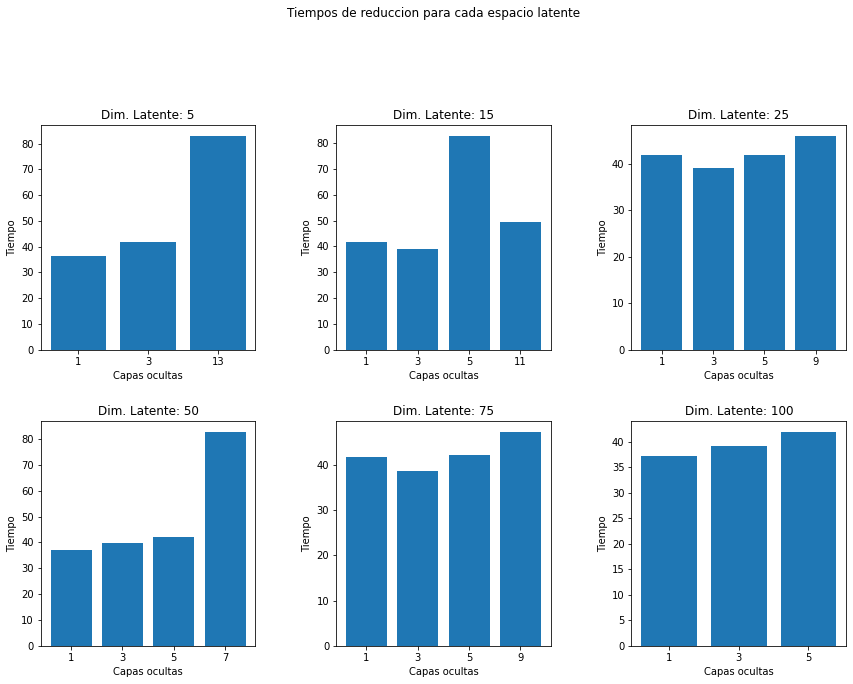

In [35]:
fig, axs = plt.subplots(2,3)
fig.suptitle("Tiempos de reduccion para cada espacio latente \n")
fig.set_figheight(10)
fig.set_figwidth(13)
fig.tight_layout(pad=5.0)
i = 0
l = [5,15,25,50,75,100]
for ax in axs:
    for a in ax:
        a.set_xlabel("Capas ocultas")
        a.set_ylabel("Tiempo")
        a.set_title("Dim. Latente: " + str(l[i]))
        a.bar(dfs[i]["nHidden"].astype(int).astype(str),height=dfs[i]["t_red"])
        i = i + 1
    

<AxesSubplot:title={'center':'Accuracy por espacio latente'}, xlabel='Dimension', ylabel='accuracy'>

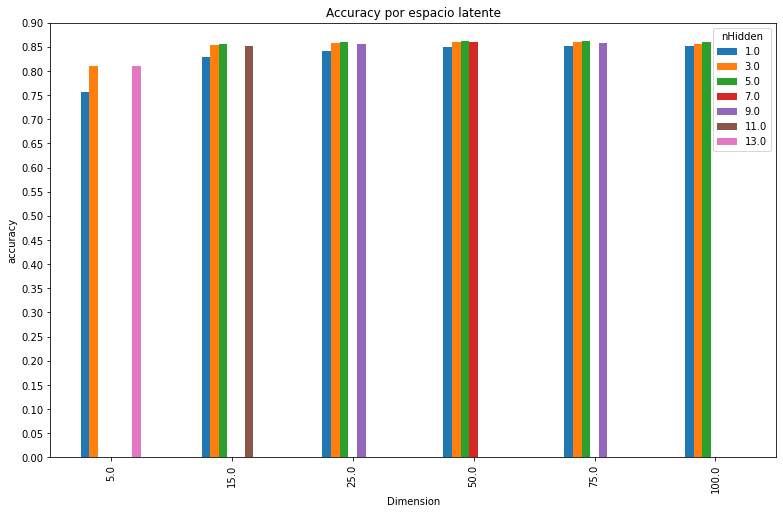

In [36]:
ticks = np.arange(0,1,0.05)
formats = df_performances.pivot("latent_dim","nHidden","acc")
formats.plot(kind='bar',figsize=(13,8),xlabel="Dimension", ylabel = "accuracy", yticks = ticks,ylim=(0,0.9), title="Accuracy por espacio latente")


<AxesSubplot:title={'center':'Tiempo de clasificacion por espacio latente'}, xlabel='Dimension', ylabel='Tiempo (s)'>

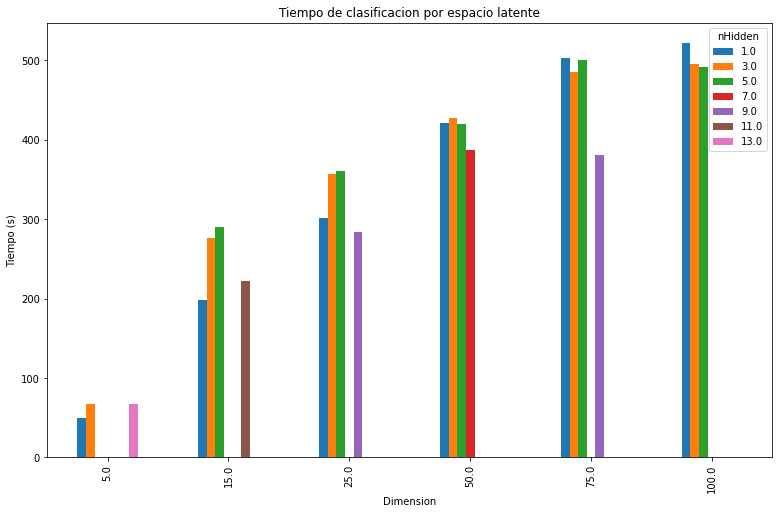

In [38]:
formats = df_performances.pivot("latent_dim","nHidden","t_classif")
formats.plot(kind='bar',figsize=(13,8),xlabel="Dimension", ylabel = "Tiempo (s)",title="Tiempo de clasificacion por espacio latente")


### Observaciones


# Nuevo experimento
Misma dimension latente, misma profundidad, distintas dimensiones intermedias (ejemplo: [500,250,125,75,50,5,50,75,125,250,500] vs [100,50,25,15,10,5,10,15,25,50,100])  
# agregar KNN SIN REDUCCION